# Insult Classification

In this exercise, we would like to filter out insulting comments on a web forum. 

To train our models, we have a list of historic comments with a judgement wether they're insulting or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pandas import Series
%matplotlib inline
path_to_insults = 'data/'
bots_data = pd.read_csv(path_to_insults + 'bots_data.csv')
nonbots_data = pd.read_csv(path_to_insults + 'nonbots_data.csv')
bots_data.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,��v��r�� �_ml�_�_���,1


In [2]:
print(bots_data.shape)
print(nonbots_data.shape)

(1056, 20)
(1176, 20)


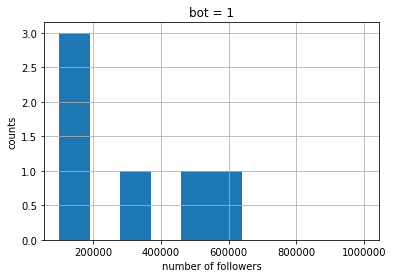

In [3]:
followers_pattern = bots_data[['followers_count']]
followers_plot = followers_pattern['followers_count'].hist(bins=10,range = (100000,1000000))
followers_plot.set_title('bot = 1')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')

In [4]:
followers_pattern_nonbot = nonbots_data[['followers_count']]
followers_pattern_nonbot.head()

,followers_count
0,571310
1,292385
2,1
3,222659
4,646


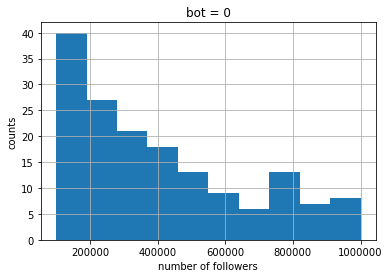

In [5]:
followers_plot = followers_pattern_nonbot['followers_count'].hist(bins=10, range =(100000, 1000000))
followers_plot.set_title('bot = 0')
followers_plot.set_xlabel('number of followers')
followers_plot.set_ylabel('counts')
followers_plot

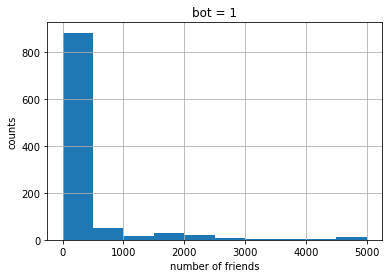

In [6]:
friends_pattern_bots = bots_data[['friends_count']]
friends_plot = friends_pattern_bots['friends_count'].hist(bins=10, range=(0,5000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

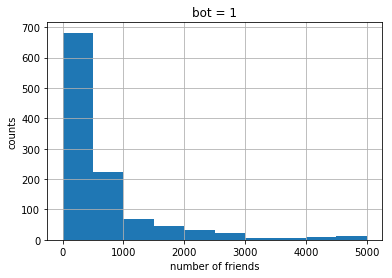

In [7]:
friends_pattern_nonbots = nonbots_data[['friends_count']]
friends_plot = friends_pattern_nonbots['friends_count'].hist(bins=10, range=(0,5000))
friends_plot.set_title('bot = 1')
friends_plot.set_xlabel('number of friends')
friends_plot.set_ylabel('counts')
friends_plot

In [12]:
from sklearn.cross_validation import train_test_split
y = df.pop('output')
X = df
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
X.iloc[X_train] # return dataframe train

NameError: name 'df' is not defined

In [14]:
frame = [bots_data, nonbots_data]
all_data = pd.concat(frame)
all_data.shape

Index([u'id', u'id_str', u'screen_name', u'location', u'description', u'url',
       u'followers_count', u'friends_count', u'listedcount', u'created_at',
       u'favourites_count', u'verified', u'statuses_count', u'lang', u'status',
       u'default_profile', u'default_profile_image', u'has_extended_profile',
       u'name', u'bot'],
      dtype='object')

In [33]:
#fill NaN with 'missing'
all_data_nafill = all_data.fillna('missing')

#encode string with utf-8
all_data_nafill['description'] = all_data_nafill['description'].str.decode('iso-8859-1').str.encode('utf-8')

# Train CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_comment_counts = count_vect.fit_transform(all_data_nafill.description)

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

from sklearn import metrics
print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 74.820789%
Precision: 82.329843%
Recall: 59.564394%
F1: 69.120879%
AUC: 74.042401%


In [19]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_comment_counts, all_data.bot)

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, X_comment_counts, all_data.bot)

print('Accuracy: %f' % (100*metrics.accuracy_score(all_data.bot, predicted)) + '%')
print('Precision: %f' % (100*metrics.precision_score(all_data.bot, predicted)) + '%')
print('Recall: %f' % (100*metrics.recall_score(all_data.bot, predicted)) + '%')
print('F1: %f' % (100*metrics.f1_score(all_data.bot, predicted)) + '%')
print('AUC: %f' % (100*metrics.roc_auc_score(all_data.bot, predicted)) + '%')

Accuracy: 73.835125%
Precision: 75.267666%
Recall: 66.571970%
F1: 70.653266%
AUC: 73.464556%


In [35]:
all_data_nafill['status'].apply(pd.Series)

,0
0,"{'retweeted': False, 'is_quote_status': False,..."
1,Status(_api=<tweepy.api.API object at 0x101927...
2,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...
3,"{u'contributors': None, u'truncated': False, u..."
4,"{u'contributors': None, u'truncated': False, u..."
5,"Status(in_reply_to_user_id=None, favorited=Fal..."
6,Status(_api=<tweepy.api.API object at 0x101927...
7,"{u'contributors': None, u'truncated': False, u..."
8,"{""created_at"": ""Mon Mar 13 02:55:10 +0000 2017..."
9,"{""created_at"": ""Mon Mar 13 02:52:13 +0000 2017..."
